In [18]:
import numpy as np
import pandas as pd 

from scipy.stats import uniform, randint

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.datasets import load_breast_cancer, load_diabetes, load_wine
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split

import xgboost as xgb 
from xgboost import plot_tree
import matplotlib.pyplot as plt

In [7]:
diabetes = load_diabetes()
train, y = diabetes.data, diabetes.target 

params = {
    "colsample_bytree": uniform(0.7, 0.3),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
}

model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)
model.fit(train, y)

search = RandomizedSearchCV(model, param_distributions=params, random_state=42, n_iter=200, 
                            cv=3, verbose=1, n_jobs=1, return_train_score=True)

search.fit(train, y)

print(search.cv_results_)


Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'mean_fit_time': array([0.02574968, 0.05861211, 0.02539976, 0.04784568, 0.05209025,
       0.04554629, 0.03134592, 0.03358698, 0.04772282, 0.02793566,
       0.05065203, 0.05374932, 0.06067578, 0.04266357, 0.04080534,
       0.03247388, 0.04991802, 0.02998432, 0.04509624, 0.04337724,
       0.04296875, 0.042521  , 0.04948076, 0.04147204, 0.02394001,
       0.02527269, 0.04903754, 0.03634127, 0.01961867, 0.0312709 ,
       0.03600939, 0.02603738, 0.037081  , 0.02885993, 0.05646348,
       0.03933167, 0.02887146, 0.03281903, 0.03708728, 0.0520459 ,
       0.03310092, 0.05204336, 0.0354623 , 0.03802331, 0.04666209,
       0.06102904, 0.04725806, 0.05267104, 0.0424153 , 0.03227488,
       0.04216973, 0.04844626, 0.03745031, 0.05459571, 0.03625139,
       0.04013888, 0.03044907, 0.02880088, 0.03866728, 0.03174869,
       0.03583137, 0.01958235, 0.01928314, 0.03587143, 0.03220232,
       0.04419899, 0.03580276, 0.03501495, 0.04590329, 0.03881208,
       0.04647438, 0.05068437, 0.03870193, 0

[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:   25.1s finished
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [29]:
train = pd.read_csv('data/pima-indians-diabetes.csv')
labels = train['1']
train.drop(columns={"1"}, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(train, labels, test_size=0.3, random_state=0)

eval_set = [(X_train, y_train), (X_test, y_test)]

In [37]:
model = xgb.XGBClassifier()
model.fit(X_train, y_train, eval_set=eval_set,
          early_stopping_rounds=10, eval_metric='logloss',
          verbose=True)

[0]	validation_0-logloss:0.657819	validation_1-logloss:0.656991
Multiple eval metrics have been passed: 'validation_1-logloss' will be used for early stopping.

Will train until validation_1-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.628005	validation_1-logloss:0.62595
[2]	validation_0-logloss:0.603164	validation_1-logloss:0.60274
[3]	validation_0-logloss:0.582054	validation_1-logloss:0.581356
[4]	validation_0-logloss:0.563526	validation_1-logloss:0.561813
[5]	validation_0-logloss:0.545561	validation_1-logloss:0.549757
[6]	validation_0-logloss:0.53138	validation_1-logloss:0.539846
[7]	validation_0-logloss:0.518471	validation_1-logloss:0.528502
[8]	validation_0-logloss:0.505834	validation_1-logloss:0.518495
[9]	validation_0-logloss:0.495385	validation_1-logloss:0.509008
[10]	validation_0-logloss:0.485141	validation_1-logloss:0.501786
[11]	validation_0-logloss:0.47606	validation_1-logloss:0.494535
[12]	validation_0-logloss:0.46701	validation_1-logloss:0.487282
[13]	

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [34]:
results = model.evals_result()
print(results['validation_0']['error'])

[0.216418, 0.222015, 0.214552, 0.216418, 0.216418, 0.210821, 0.208955, 0.205224, 0.203358, 0.205224, 0.205224, 0.197761, 0.192164, 0.190299, 0.184701, 0.182836, 0.18097, 0.182836, 0.186567, 0.175373, 0.171642, 0.169776, 0.166045, 0.164179, 0.162313, 0.162313, 0.164179, 0.160448, 0.162313, 0.156716, 0.156716, 0.154851, 0.154851, 0.154851, 0.156716, 0.152985, 0.154851, 0.156716, 0.154851, 0.151119, 0.151119, 0.151119, 0.151119, 0.149254, 0.143657, 0.143657, 0.143657, 0.143657, 0.13806, 0.143657, 0.139925, 0.136194, 0.134328, 0.134328, 0.134328, 0.134328, 0.132463, 0.130597, 0.136194, 0.136194, 0.134328, 0.132463, 0.128731, 0.128731, 0.126866, 0.126866, 0.126866, 0.126866, 0.126866, 0.126866, 0.128731, 0.128731, 0.126866, 0.126866, 0.125, 0.125, 0.125, 0.126866, 0.126866, 0.126866, 0.125, 0.126866, 0.126866, 0.126866, 0.123134, 0.123134, 0.121269, 0.119403, 0.117537, 0.115672, 0.117537, 0.115672, 0.117537, 0.117537, 0.117537, 0.115672, 0.110075, 0.108209, 0.106343, 0.108209]


In [38]:
y_pred = model.predict(X_test)
print("Accuracy score is: ", accuracy_score(y_test, y_pred))

Accuracy score is:  0.7792207792207793


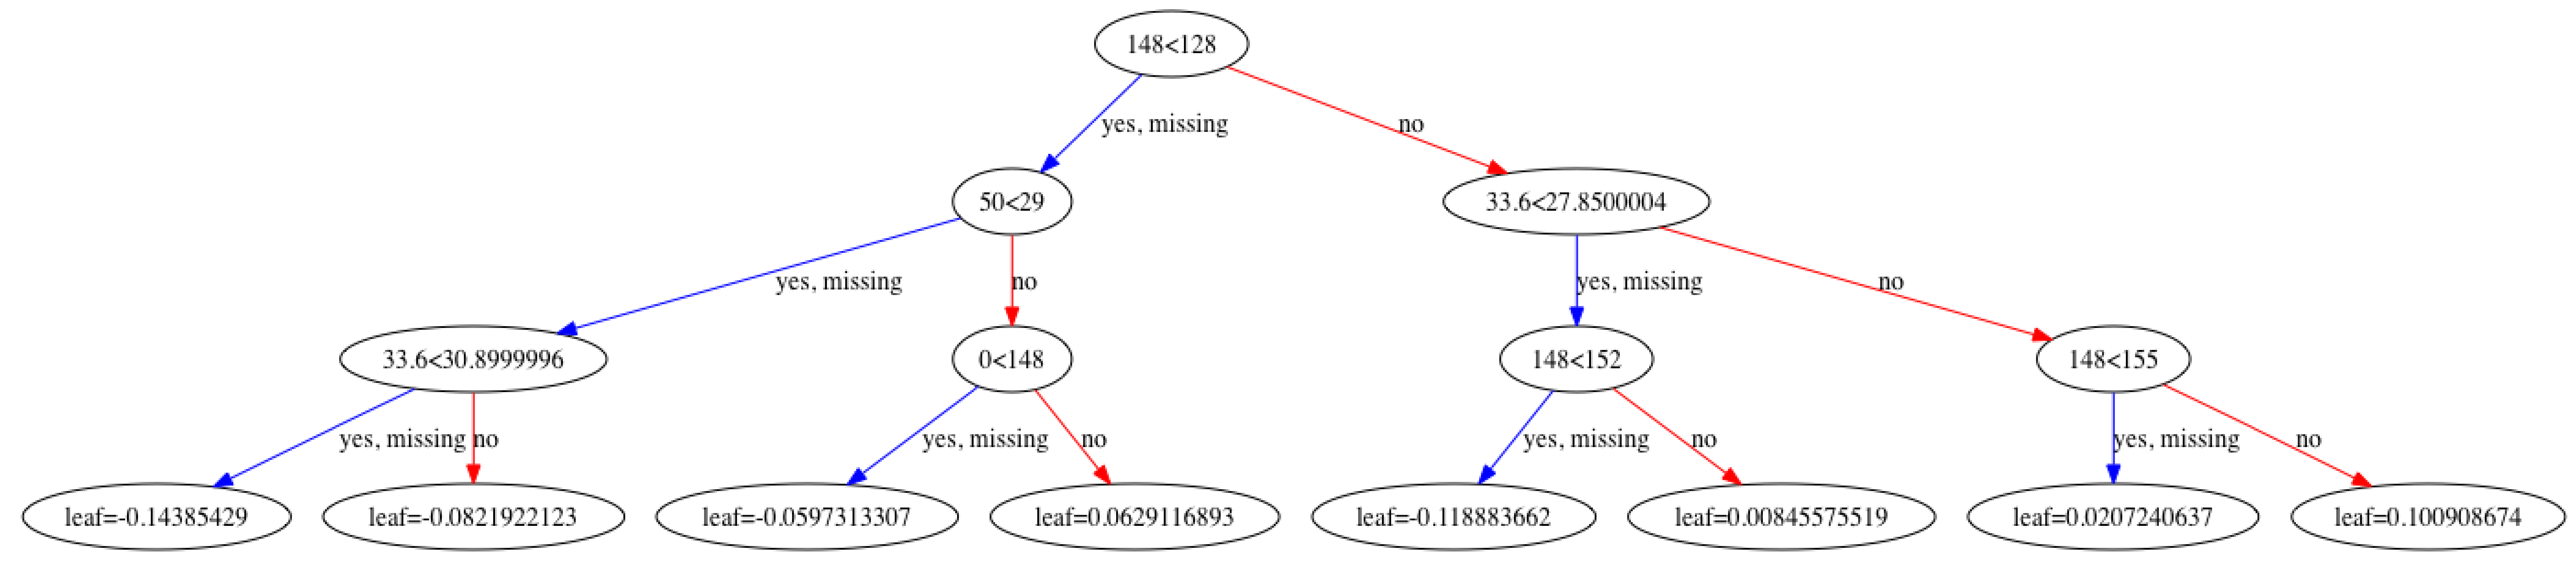

In [28]:
fig, ax = plt.subplots(figsize=(100, 30))
plot_tree(model, num_trees=4, ax=ax)
plt.show()

In [40]:
train = pd.read_csv('/Users/alpha/Downloads/train.csv')
labels = train['Presence']
train.drop(columns={'Presence'}, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(train, labels, test_size=0.2, random_state=0)
eval_set = [(X_train, y_train), (X_test, y_test)]

In [42]:
model = xgb.XGBClassifier()
model.fit(X_train, y_train, eval_set=eval_set,
          early_stopping_rounds=10, eval_metric='auc',
          verbose=True)

[0]	validation_0-auc:1	validation_1-auc:0.999999
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:1	validation_1-auc:0.999999
[2]	validation_0-auc:1	validation_1-auc:0.999999
[3]	validation_0-auc:1	validation_1-auc:0.999999
[4]	validation_0-auc:1	validation_1-auc:0.999999
[5]	validation_0-auc:1	validation_1-auc:0.999999
[6]	validation_0-auc:1	validation_1-auc:0.999999
[7]	validation_0-auc:1	validation_1-auc:0.999999
[8]	validation_0-auc:1	validation_1-auc:0.999999
[9]	validation_0-auc:1	validation_1-auc:0.999999
[10]	validation_0-auc:1	validation_1-auc:0.999999
Stopping. Best iteration:
[0]	validation_0-auc:1	validation_1-auc:0.999999



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [43]:
test = pd.read_csv('/Users/alpha/Downloads/test.csv')
y_pred = model.predict(test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [44]:
sub = pd.read_csv('/Users/alpha/Downloads/temperature_submission.csv')
sub['Presence'] = y_pred
sub.to_csv('/Users/alpha/Downloads/submission.csv', index=False)

In [60]:
import pickle 
pickle.dump(model, open('/Users/alpha/Downloads/best_shrimp_1.0_xgboost.pkl', 'wb'))
print("Done")

Done


In [57]:
best_model = pickle.load(open("/Users/alpha/Downloads/best_shrimp_1.0_xgboost.pkl", "rb"))
best_preds = best_model.predict(test)
best_preds

array([0, 0, 0, ..., 0, 0, 0])

In [59]:
sub['Presence'] = best_preds
sub.to_csv('/Users/alpha/Downloads/submission2.csv', index=False)